Figure set up
done with rho plot in  22.66318917274475  seconds
done with mag plot in  22.87256383895874  seconds
done with stress plot in  27.552361965179443  seconds
done with rho plot in  27.831565380096436  seconds
done
Run time is  100.97675037384033  seconds


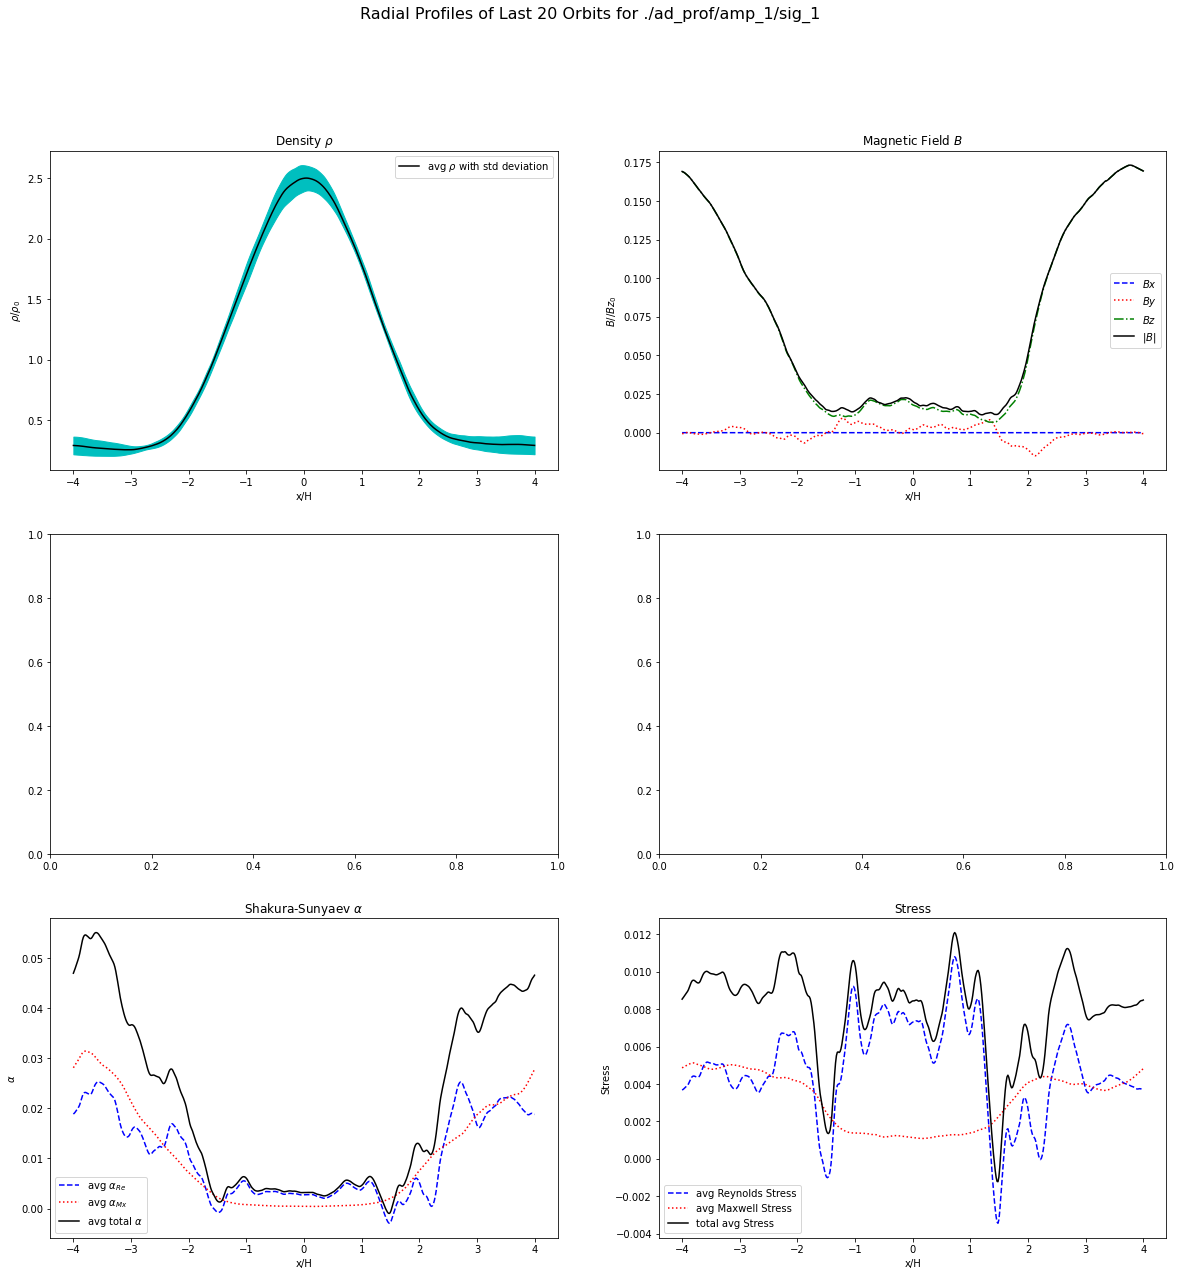

In [1]:
#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)

file_path = './ad_prof/amp_1/sig_1'


def complete_profiles(file_path):
    #figure setup---------------------------------------------------------------
    fig,ax = plt.subplots(3,2)
    fig.set_size_inches(20,20)
    x_arr = np.linspace(-4,4,512)
    sptitle = 'Radial Profiles of Last 20 Orbits for '+file_path
    fig.suptitle(sptitle,fontsize=16)

    print('Figure set up')
    #rho plot -----------------------------------------------------------------
    rho_time = time.time()
    prof_rho,err = cmp.avg_rho_prof(file_path)
    ax[0,0].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with std deviation')
    ax[0,0].fill_between(x_arr,prof_rho-err,prof_rho+err,color ='c')
    ax[0,0].legend()
    ax[0,0].set_xlabel('x/H')
    ax[0,0].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$'
    ax[0,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    
    #magnetic plot------------------------------------------------------------------------
    mag_time = time.time()
    prof_bx,prof_by,prof_bz,prof_bmag = cmp.avg_mag_prof(file_path)
    ax[0,1].plot(x_arr,prof_bx,'b--',label ='$Bx$')
    ax[0,1].plot(x_arr,prof_by,'r:',label ='$By$')
    ax[0,1].plot(x_arr,prof_bz,'g-.',label ='$Bz$')
    ax[0,1].plot(x_arr,prof_bmag,'k',label ='$|B|$')
    ax[0,1].legend()
    ax[0,1].set_xlabel('x/H')
    ax[0,1].set_ylabel('$B//Bz_{0}$')
    subtitle = 'Magnetic Field $B$'
    ax[0,1].set_title(subtitle)
    print('done with mag plot in ',(time.time()-mag_time),' seconds')
    
    #stress plot-----------------------------------------------------------------
    stress_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_stress_prof(file_path)
    ax[2,1].plot(x_arr,prof_avg_reyn,'b--',label='avg Reynolds Stress')
    ax[2,1].plot(x_arr,prof_avg_maxw,'r:',label='avg Maxwell Stress')
    ax[2,1].plot(x_arr,(prof_avg_tot),'k',label='total avg Stress')
    ax[2,1].legend()
    ax[2,1].set_xlabel('x/H')
    ax[2,1].set_ylabel('Stress')
    subtitle = 'Stress'
    ax[2,1].set_title(subtitle)   
    print('done with stress plot in ',(time.time()-stress_time),' seconds')


    #Alpha plot-----------------------------------------------------------------
    alpha_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
    ax[2,0].plot(x_arr,prof_avg_reyn,'b--',label='avg $\\alpha_{Re}$')
    ax[2,0].plot(x_arr,prof_avg_maxw,'r:',label='avg $\\alpha_{Mx}$')
    ax[2,0].plot(x_arr,(prof_avg_tot),'k',label='avg total $\\alpha$')
    ax[2,0].legend()
    ax[2,0].set_xlabel('x/H')
    ax[2,0].set_ylabel('$\\alpha$')
    subtitle = 'Shakura-Sunyaev $\\alpha$'
    ax[2,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-alpha_time),' seconds')
    
    ans = 'done'

    return ans
    
print(complete_profiles(file_path))    
print('Run time is ',(time.time()-start),' seconds' )